# CIF

The `Cif` class generates an object for each `.cif` file. Each object can

- compute the coordination numbers for each site label using four methods
- compute bond fractions and bond counts at each site within the specified cutoff radius or based on -coordination number geometry
- categorize atomic mixing at bond-pair and file levels
- list all possible bond and label pairs derived from the formula
- generate a unit cell and a supercell by applying ±1 shifts
- parse formulas, structures, tags, space group names, supercell sizes, and elements

You can initialize `Cif` object using a file path to the `.cif` file. Or you can simply use the example `.cif` provided in `cifkit` below.

In [1]:
from cifkit import Example
from cifkit import Cif

# Initalize with the example file provided
cif = Cif(Example.Er10Co9In20_file_path)

# Print attributes
print("File name:", cif.file_name)
print("Formula:", cif.formula)
print("Unique element:", cif.unique_elements)

File name: Er10Co9In20.cif
Formula: Er10Co9In20
Unique element: {'In', 'Er', 'Co'}


## Get instant properties - parsed information

The `Cif` class provides a set of accessible properties that can be accessed. Each object is intialized with the `file_path` to the `.cif` file.

In [2]:
from cifkit import Cif, Example
import json

# Utility function for printing dictionary
def prettify_dict(dict_data):
  return json.dumps(dict_data, indent=4)

# Initialize
cif = Cif(Example.ErCoIn5_file_path)

# Print instantly available properties
print("Formula:", cif.formula)
print("Structure:", cif.structure)
print("Unique elements:", cif.unique_elements)
print("Unitcell lenghts:", cif.unitcell_lengths)
print("Unitcell angles:", cif.unitcell_angles)
print("Site labels:", cif.site_labels)
print("Weight:", cif.weight)
print("Atomic mixing type:", cif.site_mixing_type)
print("Space group number:", cif.space_group_number)
print("Space group number:", cif.space_group_name)
print("Composition type:", cif.composition_type) # 3 -> Ternary
print("Tag:", cif.tag)
print("Atom_site_info:", prettify_dict(cif.atom_site_info))
print("Wyckoff_symbol of Er1:", cif.atom_site_info["Er"]["wyckoff_symbol"])

Formula: ErCoIn5
Structure: HoCoGa5
Unique elements: {'Co', 'Er', 'In'}
Unitcell lenghts: [4.54, 4.54, 7.397]
Unitcell angles: [1.5708, 1.5708, 1.5708]
Site labels: ['In2', 'In1', 'Co', 'Er']
Weight: 800.3
Atomic mixing type: full_occupancy
Space group number: 123
Space group number: P4/mmm
Composition type: 3
Tag: rt
Atom_site_info: {
    "In2": {
        "element": "In",
        "site_occupancy": 1.0,
        "x_frac_coord": 0.0,
        "y_frac_coord": 0.5,
        "z_frac_coord": 0.30474,
        "symmetry_multiplicity": 4,
        "wyckoff_symbol": "i"
    },
    "In1": {
        "element": "In",
        "site_occupancy": 1.0,
        "x_frac_coord": 0.5,
        "y_frac_coord": 0.5,
        "z_frac_coord": 0.0,
        "symmetry_multiplicity": 1,
        "wyckoff_symbol": "c"
    },
    "Co": {
        "element": "Co",
        "site_occupancy": 1.0,
        "x_frac_coord": 0.0,
        "y_frac_coord": 0.0,
        "z_frac_coord": 0.5,
        "symmetry_multiplicity": 1,
        "

### How tag is parsed

Tag is parsed from the thrid line of each `.cif` file. Some databases such as Pearson's Crystal Data offers tags for each file.



## Get instant properties - bond pairs

- The following code returns all possible element and site pairs from the formula in the .cif file.
- The `mixing_info_per_label_pair` and `mixing_info_per_label_pair_sorted_by_mendeleev` return site mixing information at the pair level.

In [3]:
from cifkit import Cif, Example

# Initialize
cif = Cif(Example.ErCoIn5_file_path)

# Utility function for printing a set of tuples
def print_tuples(tuples):
  for pair in tuples:
    print(f"({pair[0]}, {pair[1]})")

# All bond pairs
print("\nAll possible bond pairs:")
print_tuples(cif.bond_pairs)

print("\nAll possible bond pairs sorted by Mendeleev:")
print_tuples(cif.bond_pairs_sorted_by_mendeleev)

# All label pairs
print("\nAll possible label pairs from the formula:")
print_tuples(cif.site_label_pairs)

print("\nAll possible label pairs sorted by Mendeleev:")
print_tuples(cif.site_label_pairs_sorted_by_mendeleev)

# Atomic mixing per pair
print("\nAtomic mixing per label pair:")
print((cif.mixing_info_per_label_pair))

print("\nAtomic mixing per label pair sorted by Mendeleev:")
print(cif.mixing_info_per_label_pair_sorted_by_mendeleev)



All possible bond pairs:
(Er, Er)
(Er, In)
(Co, Er)
(Co, In)
(In, In)
(Co, Co)

All possible bond pairs sorted by Mendeleev:
(Er, Er)
(Er, Co)
(Er, In)
(Co, In)
(In, In)
(Co, Co)

All possible label pairs from the formula:
(Er, Er)
(Er, In2)
(Er, In1)
(Co, In2)
(In2, In2)
(In1, In2)
(Co, In1)
(In1, In1)
(Co, Er)
(Co, Co)

All possible label pairs sorted by Mendeleev:
(Er, Er)
(Er, In2)
(Er, Co)
(Er, In1)
(Co, In2)
(In2, In2)
(In1, In2)
(Co, In1)
(In1, In1)
(Co, Co)

Atomic mixing per label pair:
{('Er', 'Er'): 'full_occupancy', ('Er', 'In2'): 'full_occupancy', ('Er', 'In1'): 'full_occupancy', ('Co', 'In2'): 'full_occupancy', ('In2', 'In2'): 'full_occupancy', ('In1', 'In2'): 'full_occupancy', ('Co', 'In1'): 'full_occupancy', ('In1', 'In1'): 'full_occupancy', ('Co', 'Er'): 'full_occupancy', ('Co', 'Co'): 'full_occupancy'}

Atomic mixing per label pair sorted by Mendeleev:
{('Er', 'Er'): 'full_occupancy', ('Er', 'In2'): 'full_occupancy', ('Er', 'Co'): 'full_occupancy', ('Er', 'In1'): 'fu

### How atomic mixing type is defined

Each bonding pair or each file is defined with one of four atomic mixing categories:

- **Full occupancy** is assigned when a single atomic site occupies the fractional coordinate with an occupancy value of 1.
- **Full occupancy with atomic mixing** is assigned when multiple atomic sites collectively occupy the fractional coordinate to a sum of 1.
- **Deficiency without atomic mixing** is assigned when a single atomic site occupying the fractional coordinate with a sum less than 1.
- **Deficiency with atomic mixing** is assigned when multiple atomic sites occupy the fractional coordinate with a sum less than 1.

## Get computed properties - nearest connections per site

This section involves computing distances between atoms. Unlike instant properties, these properties may require extensive computation, typically ranging from 1-2 seconds for larger supercells containing more than 3,000 atoms.

These properties are loaded lazily, meaning accessing any of the properties will execute `compute_connections()` internally. This function will then compute `connections`, providing all the nearest neighbors for each site.

There are options in the `Cif` class to use either the `by_d_min_method` or `by_best_methods`. Please refer to the `README.md` for complete documentation.


In [4]:

from cifkit import Cif, Example

def print_connected_points(all_labels_connections):
    """
    Utility function for printing connections per site label
    """
    for label, connections in all_labels_connections.items():
        print(f"\nAtom site {label}:")
        for (
            connected_label,
            dist,
            coords_1,
            coords_2,
        ) in connections:
            print(f"{connected_label} {dist} {coords_1}, {coords_2}")


# Initialize
cif = Cif(Example.ErCoIn5_file_path)

# Print CN Connections
print("\nFind CN_connections_by_min_dist_method:")
print_connected_points(cif.CN_connections_by_min_dist_method)

print("\nFind CN_connections_by_best_methods:")
print_connected_points(cif.CN_connections_by_best_methods)


Find CN_connections_by_min_dist_method:

Atom site In2:
Co 2.691 [0.0, -2.27, -2.254], [0.0, -4.54, -3.698]
Co 2.691 [0.0, -2.27, -2.254], [0.0, 0.0, -3.698]
In2 2.889 [0.0, -2.27, -2.254], [0.0, -2.27, -5.143]
Er 3.199 [0.0, -2.27, -2.254], [0.0, -4.54, 0.0]
Er 3.199 [0.0, -2.27, -2.254], [0.0, 0.0, 0.0]
In1 3.199 [0.0, -2.27, -2.254], [2.27, -2.27, 0.0]
In1 3.199 [0.0, -2.27, -2.254], [-2.27, -2.27, 0.0]
In2 3.21 [0.0, -2.27, -2.254], [-2.27, -4.54, -2.254]
In2 3.21 [0.0, -2.27, -2.254], [2.27, -4.54, -2.254]
In2 3.21 [0.0, -2.27, -2.254], [-2.27, 0.0, -2.254]
In2 3.21 [0.0, -2.27, -2.254], [2.27, 0.0, -2.254]

Atom site In1:
In2 3.199 [-2.27, -2.27, 0.0], [-2.27, -4.54, 2.254]
In2 3.199 [-2.27, -2.27, 0.0], [-4.54, -2.27, 2.254]
In2 3.199 [-2.27, -2.27, 0.0], [-2.27, -4.54, -2.254]
In2 3.199 [-2.27, -2.27, 0.0], [-2.27, -0.0, 2.254]
In2 3.199 [-2.27, -2.27, 0.0], [0.0, -2.27, 2.254]
In2 3.199 [-2.27, -2.27, 0.0], [-4.54, -2.27, -2.254]
In2 3.199 [-2.27, -2.27, 0.0], [0.0, -2.27, -2

## Get computed properties - distances

You can get the shortest distance from each site label or the shortest distance for each possible bond pair.

In [5]:
from cifkit import Cif, Example

# Initialize
cif = Cif(Example.ErCoIn5_file_path)

print("Shortest distance:", cif.shortest_distance)
print("Shortest bond pair distances:", cif.shortest_bond_pair_distance)
print("Shortest site pair distances:", cif.shortest_site_pair_distance)

Shortest distance: 2.691
Shortest bond pair distances: {('Co', 'In'): 2.691, ('In', 'In'): 2.889, ('Er', 'In'): 3.199, ('Co', 'Er'): 3.698, ('Co', 'Co'): 4.54, ('Er', 'Er'): 4.54}
Shortest site pair distances: {'In2': ('Co', 2.691), 'In1': ('In2', 3.199), 'Co': ('In2', 2.691), 'Er': ('In2', 3.199)}


## Get computed properties - coordination numbers

Compute `avg`, `min`, `max`, `unique` of coordination numbers determined by one of the best methods or min distance method.

In [6]:
from cifkit import Cif, Example

# Initialize
cif = Cif(Example.ErCoIn5_file_path)

# Bond counts
print("\nCN_bond_count_by_min_dist_method:")
print(cif.CN_bond_count_by_min_dist_method)

print("\nCN_bond_count_by_min_dist_method_sorted_by_mendeleev:")
print(cif.CN_bond_count_by_min_dist_method_sorted_by_mendeleev)

print("\nCN_bond_count_by_best_methods:")
print(cif.CN_bond_count_by_best_methods)

print("\nCN_bond_count_by_best_methods_sorted_by_mendeleev:")
print(cif.CN_bond_count_by_best_methods_sorted_by_mendeleev)

# Bond fractions
print("\nCN_bond_fractions_by_min_dist_method:")
print(cif.CN_bond_fractions_by_min_dist_method)

print("\nCN_bond_fractions_by_min_dist_method_sorted_by_mendeleev:")
print(cif.CN_bond_fractions_by_min_dist_method_sorted_by_mendeleev)

print("\nCN_bond_fractions_by_best_methods:")
print(cif.CN_bond_fractions_by_best_methods)

print("\nCN_bond_fractions_by_best_methods_sorted_by_mendeleev:")
print(cif.CN_bond_fractions_by_best_methods_sorted_by_mendeleev)

# Unique coordination numbers
print("\nCN_unique_values_by_min_dist_method")
print(cif.CN_unique_values_by_min_dist_method)

print("\nCN_unique_values_by_best_methods")
print(cif.CN_unique_values_by_best_methods)

# Average coordination number
print("\nCN_avg_by_min_dist_method:")
print(cif.CN_avg_by_min_dist_method)

print("\nCN_avg_by_best_methods: ")
print(cif.CN_avg_by_best_methods)

# Min coordination number
print("\nCN_max_by_min_dist_method:")
print(cif.CN_max_by_min_dist_method)

print("\nCN_max_by_best_methods:")
print(cif.CN_max_by_best_methods)

# Max coordination number
print("\nCN_min_by_min_dist_method:")
print(cif.CN_min_by_min_dist_method)

print("\nCN_min_by_best_methods:")
print(cif.CN_min_by_best_methods)


CN_bond_count_by_min_dist_method:
{'In2': {('Co', 'In'): 2, ('In', 'In'): 7, ('Er', 'In'): 2}, 'In1': {('In', 'In'): 8, ('Er', 'In'): 4}, 'Co': {('Co', 'In'): 8}, 'Er': {('Er', 'In'): 12, ('Co', 'Er'): 2, ('Er', 'Er'): 4}}

CN_bond_count_by_min_dist_method_sorted_by_mendeleev:
{'In2': {('Co', 'In'): 2, ('In', 'In'): 7, ('Er', 'In'): 2}, 'In1': {('In', 'In'): 8, ('Er', 'In'): 4}, 'Co': {('Co', 'In'): 8}, 'Er': {('Er', 'In'): 12, ('Er', 'Co'): 2, ('Er', 'Er'): 4}}

CN_bond_count_by_best_methods:
{'In2': {('Co', 'In'): 2, ('In', 'In'): 7, ('Er', 'In'): 2}, 'In1': {('In', 'In'): 8, ('Er', 'In'): 4}, 'Co': {('Co', 'In'): 8, ('Co', 'Er'): 2, ('Co', 'Co'): 4}, 'Er': {('Er', 'In'): 12, ('Co', 'Er'): 2, ('Er', 'Er'): 4}}

CN_bond_count_by_best_methods_sorted_by_mendeleev:
{'In2': {('Co', 'In'): 2, ('In', 'In'): 7, ('Er', 'In'): 2}, 'In1': {('In', 'In'): 8, ('Er', 'In'): 4}, 'Co': {('Co', 'In'): 8, ('Er', 'Co'): 2, ('Co', 'Co'): 4}, 'Er': {('Er', 'In'): 12, ('Er', 'Co'): 2, ('Er', 'Er'): 4}}

C

## Draw polyhedrons

You may use `Jupyter` notebook or a python script to execute the following to generate and save a polyhedron generated from each site and the nearest neighbor atoms are determined from the coordination number geometry.


Site labels: ['In2', 'In1', 'Co', 'Er']


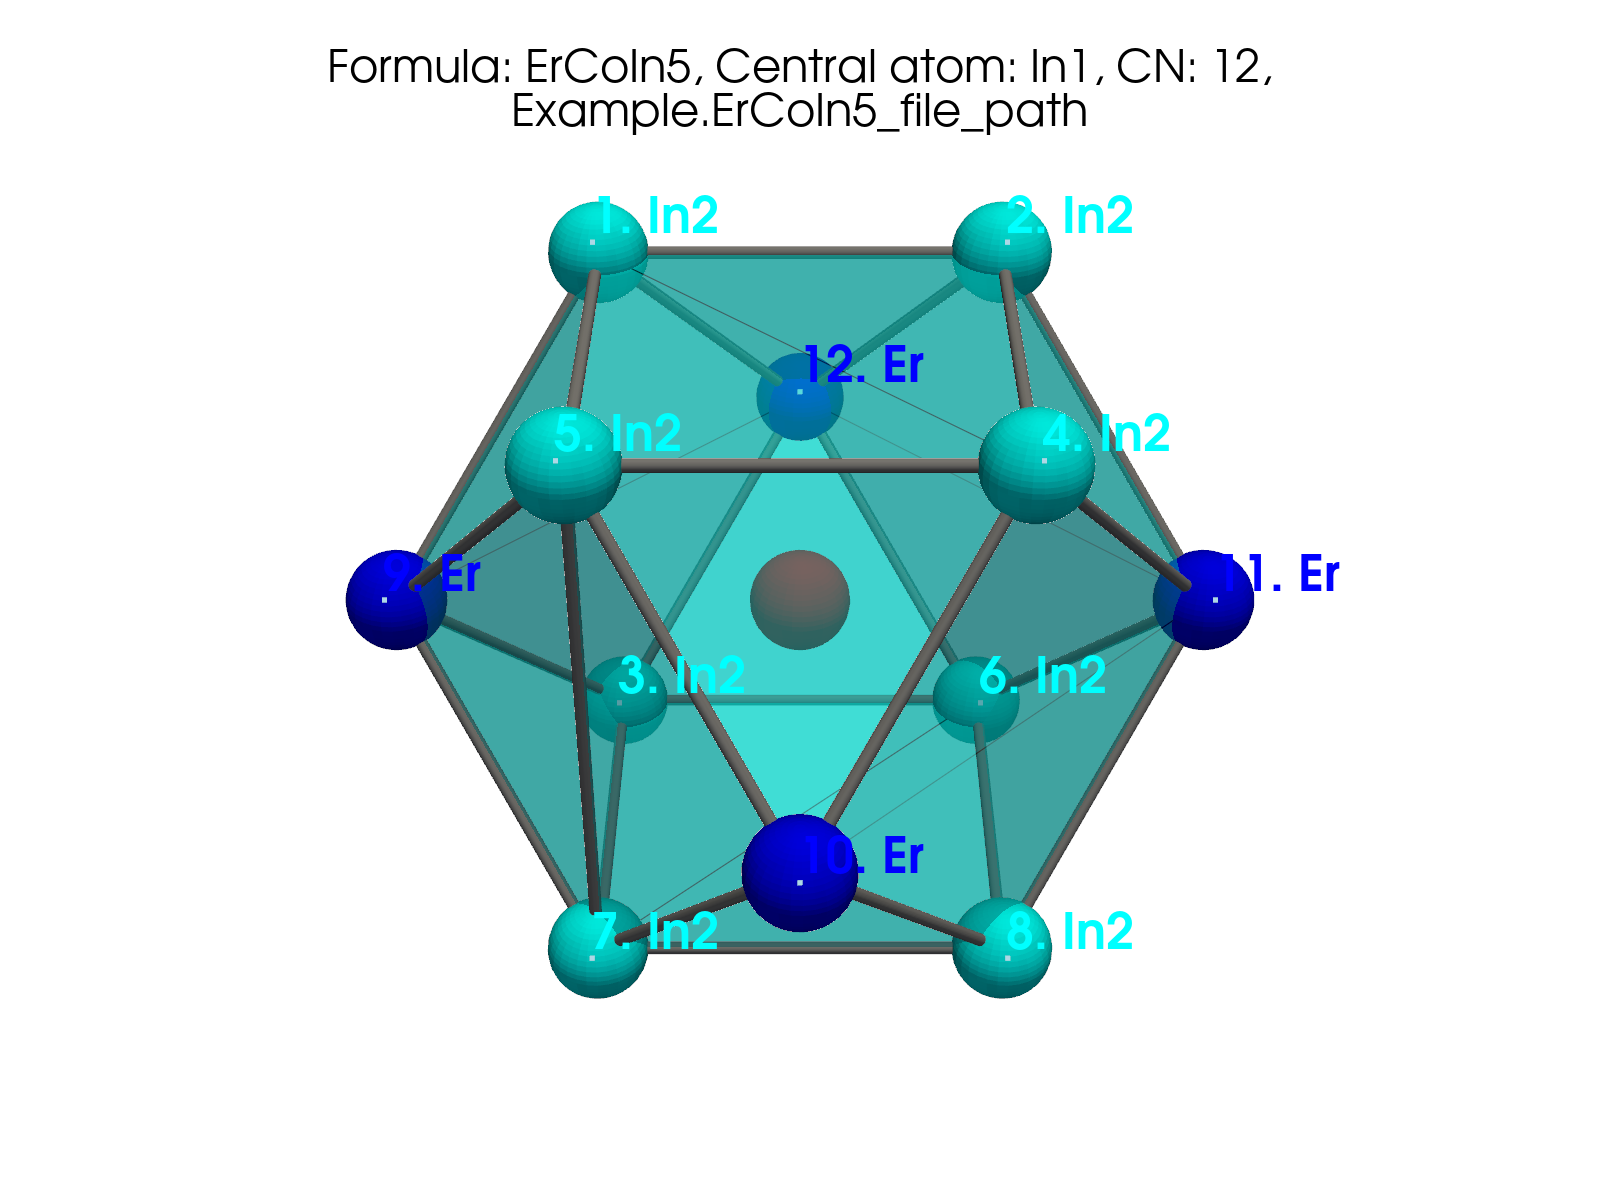

In [7]:
from cifkit import Cif, Example
import warnings
warnings.filterwarnings('ignore') # For Jupyter Notebook only

# Initialize
cif = Cif(Example.ErCoIn5_file_path)

# Enter site labels. you can get site labels using cif.labels
print("Site labels:", cif.site_labels)

# Plot
cif.plot_polyhedron("In1", is_displayed=True)